In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas

%matplotlib inline

In [3]:
adjs = np.load('../data/connection_matrix.npy')

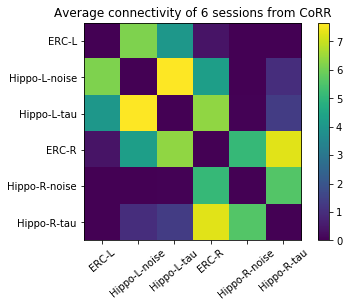

In [12]:
plt.imshow(np.log(np.mean(adjs, axis=2)+1))
labs = ['ERC-L', 'Hippo-L-noise', 'Hippo-L-tau',
        'ERC-R', 'Hippo-R-noise', 'Hippo-R-tau']
plt.xticks(np.arange(0, 6), labs, rotation=40)
plt.yticks(np.arange(0, 6), labs)
plt.title('Average connectivity of {} sessions from CoRR'.format(len(adjs)))
plt.colorbar()
plt.show()

## Unweighted Analysis

In [13]:
lhs = stats.ttest_ind(adjs[0,1,:], adjs[0,2,:])
rhs = stats.ttest_ind(adjs[3,4,:], adjs[3,5,:])
print("Left: {}".format(lhs))
print("Right: {}".format(rhs))

Left: Ttest_indResult(statistic=14.88414744997182, pvalue=8.540326043695926e-44)
Right: Ttest_indResult(statistic=-18.576482462264657, pvalue=4.7578445685085678e-63)


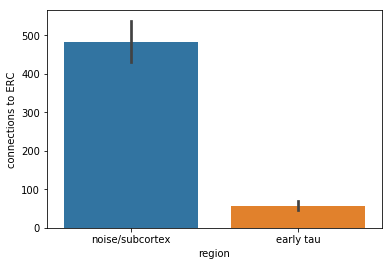

In [16]:
jnk_lhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to ERC','region'])
jnk_lhs.loc[jnk_lhs.index[:adjs.shape[2]],'connections to ERC'] = adjs[0,1,:]
jnk_lhs.loc[jnk_lhs.index[adjs.shape[2]]:,'connections to ERC'] = adjs[0,2,:]
jnk_lhs.loc[jnk_lhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_lhs.loc[jnk_lhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to ERC',data=jnk_lhs)

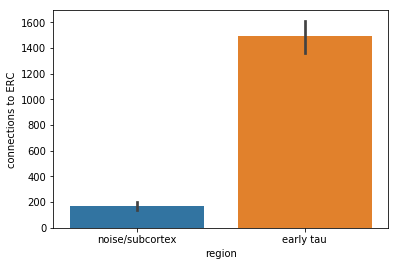

In [17]:
jnk_rhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to ERC','region'])
jnk_rhs.loc[jnk_rhs.index[:adjs.shape[2]],'connections to ERC'] = adjs[3,4,:]
jnk_rhs.loc[jnk_rhs.index[adjs.shape[2]]:,'connections to ERC'] = adjs[3,5,:]
jnk_rhs.loc[jnk_rhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_rhs.loc[jnk_rhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to ERC',data=jnk_rhs)

## Weighted Analysis (Sizes)

In [19]:
hippo_size_lhs = np.load('../data/cho_hippo_left_sizes.npy')
hippo_size_rhs = np.load('../data/cho_hippo_right_sizes.npy')

In [23]:
size_lhs = stats.ttest_ind(adjs[0,1,:]/hippo_size_lhs[0], adjs[0,2,:]/hippo_size_lhs[1])
size_rhs = stats.ttest_ind(adjs[3,4,:]/hippo_size_rhs[0], adjs[3,5,:]/hippo_size_rhs[1])
print("Left: {}".format(size_lhs))
print("Right: {}".format(size_rhs))

Left: Ttest_indResult(statistic=14.894053902824826, pvalue=7.6291116336633622e-44)
Right: Ttest_indResult(statistic=-20.43914353269745, pvalue=2.4612034120738237e-73)


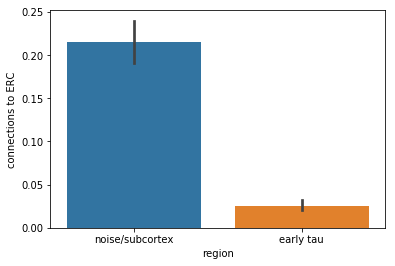

In [26]:
jnk_size_lhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to ERC','region'])
jnk_size_lhs.loc[jnk_size_lhs.index[:adjs.shape[2]],'connections to ERC'] = adjs[0,1,:]/hippo_size_lhs[0]
jnk_size_lhs.loc[jnk_size_lhs.index[adjs.shape[2]]:,'connections to ERC'] = adjs[0,2,:]/hippo_size_lhs[1]
jnk_size_lhs.loc[jnk_size_lhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_size_lhs.loc[jnk_size_lhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to ERC',data=jnk_size_lhs)

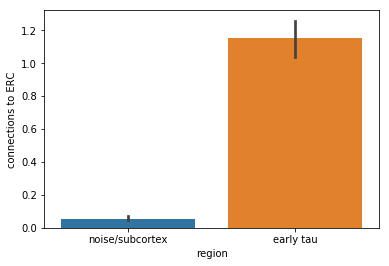

In [27]:
jnk_size_rhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to ERC','region'])
jnk_size_rhs.loc[jnk_size_rhs.index[:adjs.shape[2]],'connections to ERC'] = adjs[3,4,:]/hippo_size_rhs[0]
jnk_size_rhs.loc[jnk_size_rhs.index[adjs.shape[2]]:,'connections to ERC'] = adjs[3,5,:]/hippo_size_rhs[1]
jnk_size_rhs.loc[jnk_size_rhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_size_rhs.loc[jnk_size_rhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to ERC',data=jnk_size_rhs)

## Weighted Analysis (Distance)

In [28]:
hippo_dist_lhs = np.load('../data/cho_hippo_left_distances.npy')
hippo_dist_rhs = np.load('../data/cho_hippo_right_distances.npy')

In [29]:
dist_lhs = stats.ttest_ind(adjs[0,1,:]/hippo_dist_lhs[0], adjs[0,2,:]/hippo_dist_lhs[1])
dist_rhs = stats.ttest_ind(adjs[3,4,:]/hippo_dist_rhs[0], adjs[3,5,:]/hippo_dist_rhs[1])
print("Left: {}".format(dist_lhs))
print("Right: {}".format(dist_rhs))

Left: Ttest_indResult(statistic=12.691571798178925, pvalue=2.1157455858955488e-33)
Right: Ttest_indResult(statistic=-20.185148381158623, pvalue=6.4593447277358187e-72)


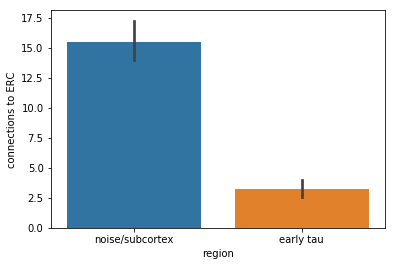

In [30]:
jnk_dist_lhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to ERC','region'])
jnk_dist_lhs.loc[jnk_dist_lhs.index[:adjs.shape[2]],'connections to ERC'] = adjs[0,1,:]/hippo_dist_lhs[0]
jnk_dist_lhs.loc[jnk_dist_lhs.index[adjs.shape[2]]:,'connections to ERC'] = adjs[0,2,:]/hippo_dist_lhs[1]
jnk_dist_lhs.loc[jnk_dist_lhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_dist_lhs.loc[jnk_dist_lhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to ERC',data=jnk_dist_lhs)

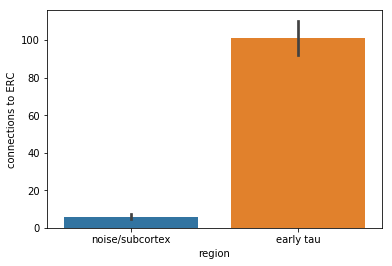

In [31]:
jnk_dist_rhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to ERC','region'])
jnk_dist_rhs.loc[jnk_dist_rhs.index[:adjs.shape[2]],'connections to ERC'] = adjs[3,4,:]/hippo_dist_rhs[0]
jnk_dist_rhs.loc[jnk_dist_rhs.index[adjs.shape[2]]:,'connections to ERC'] = adjs[3,5,:]/hippo_dist_rhs[1]
jnk_dist_rhs.loc[jnk_dist_rhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_dist_rhs.loc[jnk_dist_rhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to ERC',data=jnk_dist_rhs)